In [1]:
from qiskit import __version__
__version__

'1.4.2'

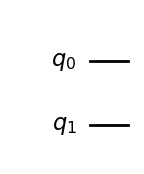

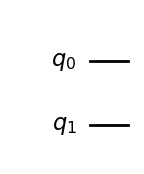

In [2]:
from qiskit import *

import matplotlib.pyplot as plt
%matplotlib inline
 
qc = QuantumCircuit(2)

qc.draw('mpl')

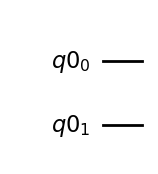

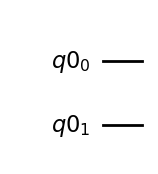

In [3]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.draw('mpl')

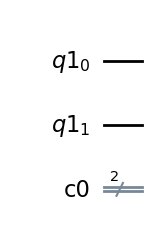

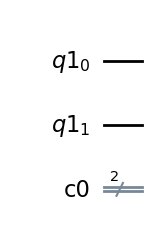

In [4]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

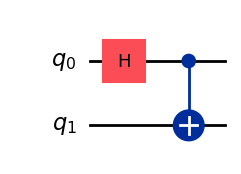

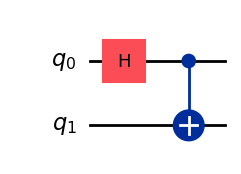

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

Statevector(qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [6]:
from qiskit.visualization.array import array_to_latex

array_to_latex(Statevector(qc))

<IPython.core.display.Latex object>

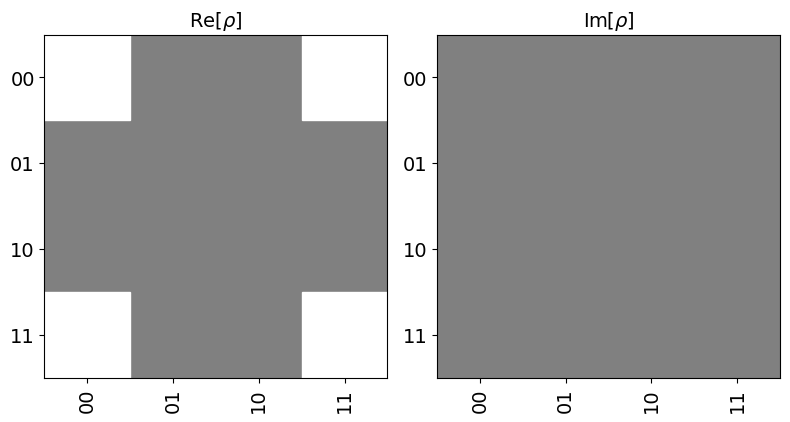

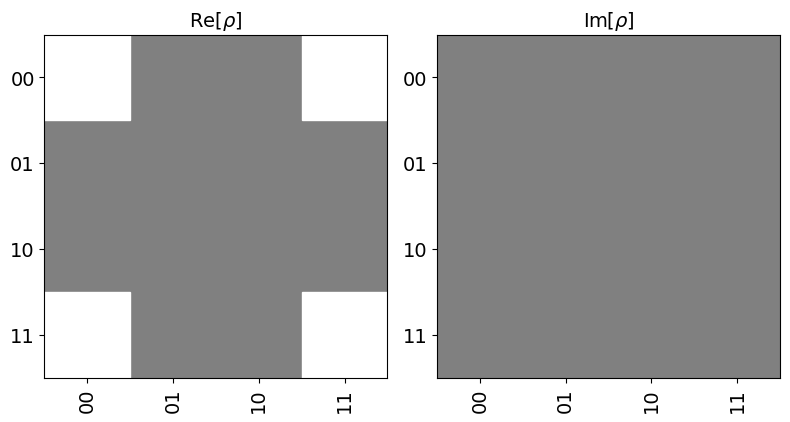

In [7]:
Statevector(qc).draw('hinton')

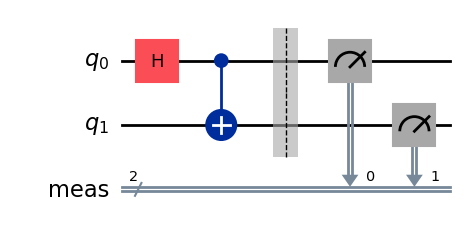

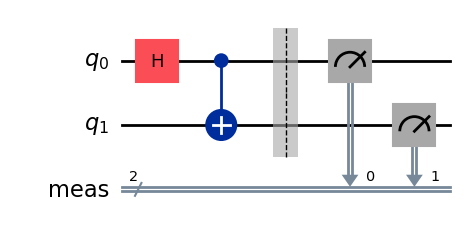

In [8]:
qc.measure_all()
qc.draw('mpl')

In [9]:
from qiskit.providers.fake_provider import GenericBackendV2

backend = GenericBackendV2(num_qubits=5)

job = backend.run(qc)

counts = job.result().get_counts()

counts

{'00': 506, '11': 512, '01': 5, '10': 1}

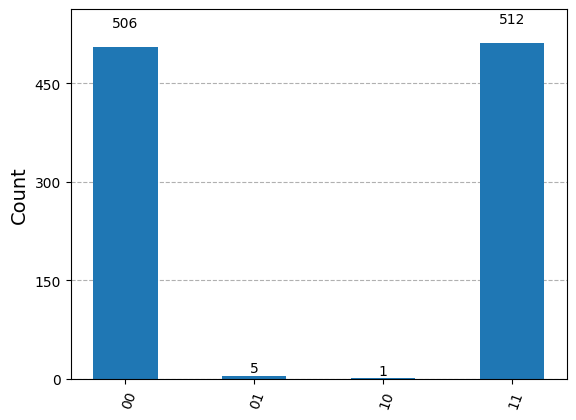

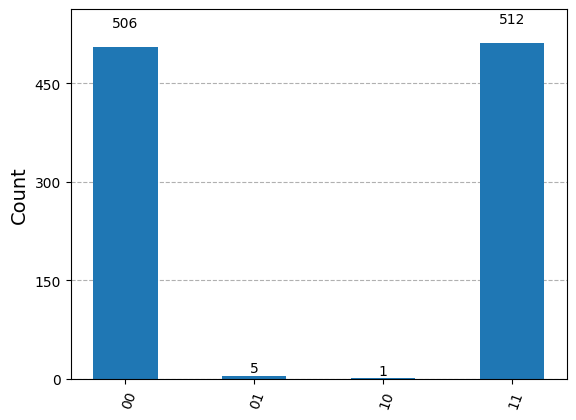

In [10]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

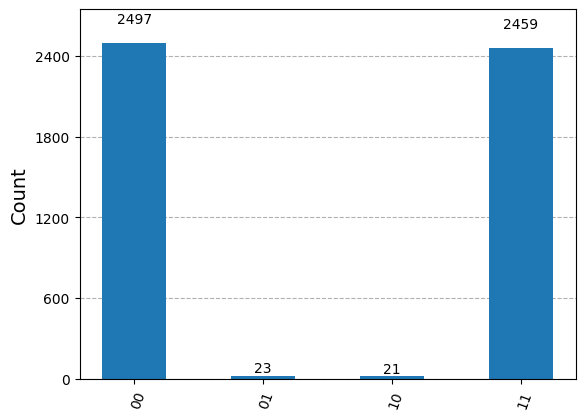

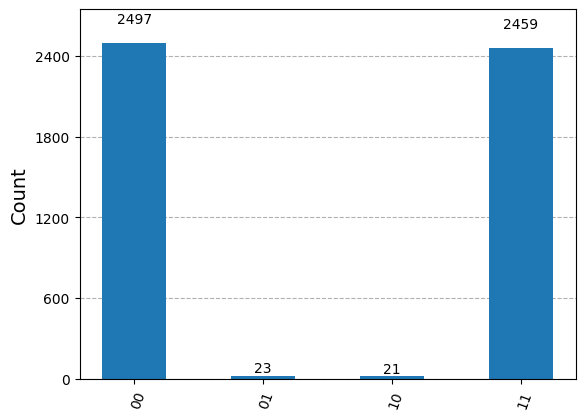

In [9]:
job = backend.run(qc, shots=5000)

counts = job.result().get_counts()

plot_histogram(counts)

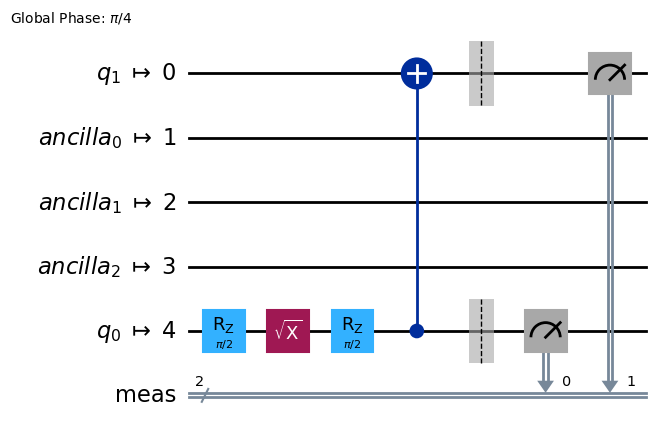

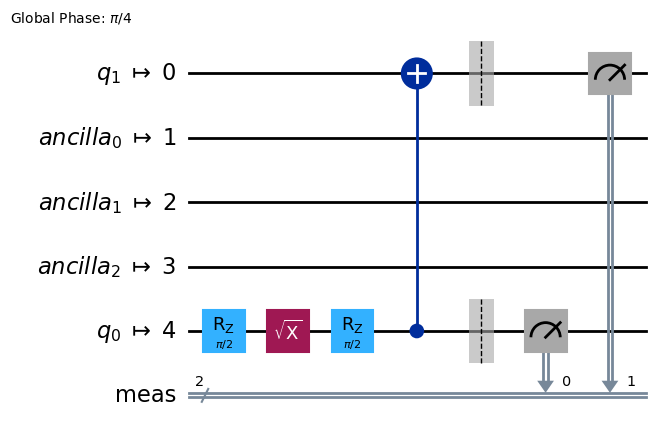

In [11]:
transpiled_qc = transpile(qc, backend)
transpiled_qc.draw('mpl')


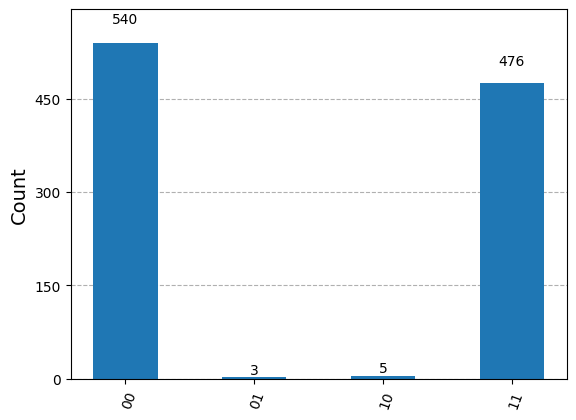

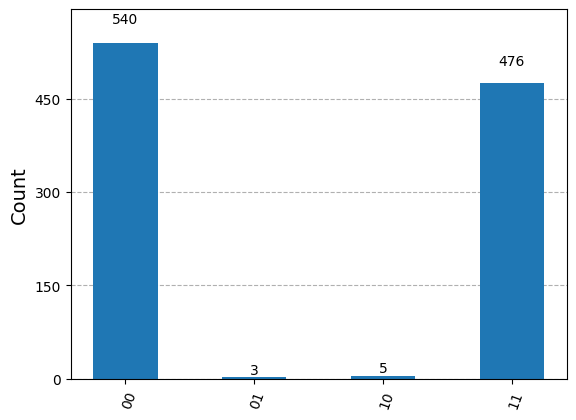

In [11]:
job = backend.run(transpiled_qc)

counts = job.result().get_counts()

plot_histogram(counts)

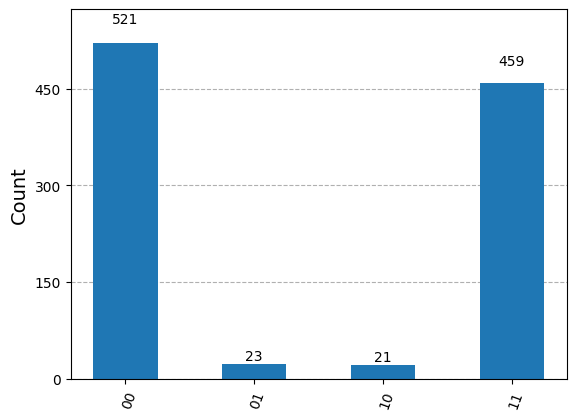

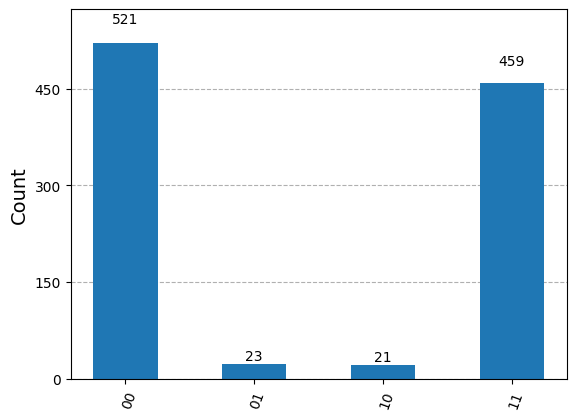

In [12]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2

backend = FakeJakartaV2()

simulator = AerSimulator.from_backend(backend)

transpiled_qc = transpile(qc, backend)

job = simulator.run(transpiled_qc)

counts = job.result().get_counts()

plot_histogram(counts)


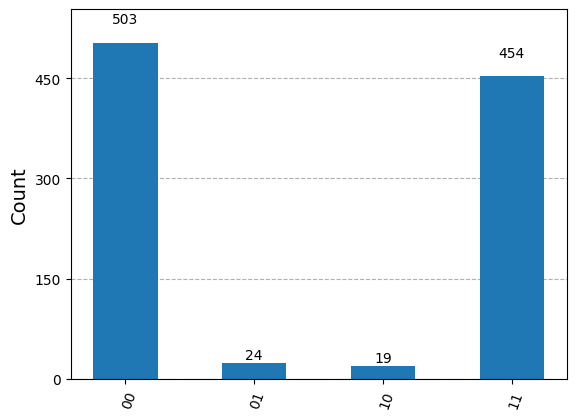

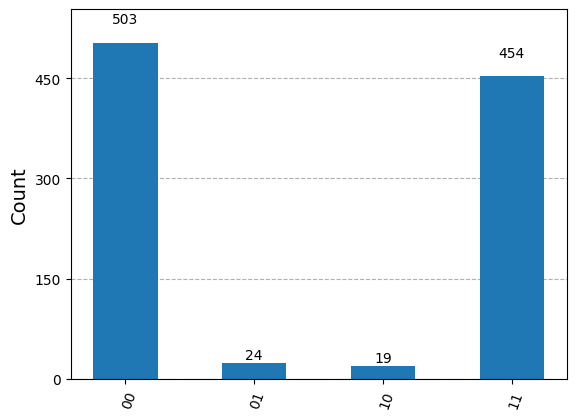

In [15]:
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2 
from qiskit_ibm_runtime import SamplerV2 as Sampler


backend = FakeJakartaV2()

transpiled_qc = transpile(qc, backend)

sampler = Sampler(backend)
job = sampler.run([(transpiled_qc, [])], shots=1000)
result = job.result()

counts = result[0].data.meas.get_counts()
plot_histogram(counts)

In [13]:
from qiskit_ibm_runtime import QiskitRuntimeService
token = "***********************************************"
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

In [14]:
service.backends()

[<IBMBackend('ibm_aachen')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_brussels')>,
 <IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_kingston')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_strasbourg')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_yonsei')>]

In [15]:
backend_real = service.backend("ibm_brisbane")

In [16]:
transpiled_qc_real = transpile(qc, backend_real)

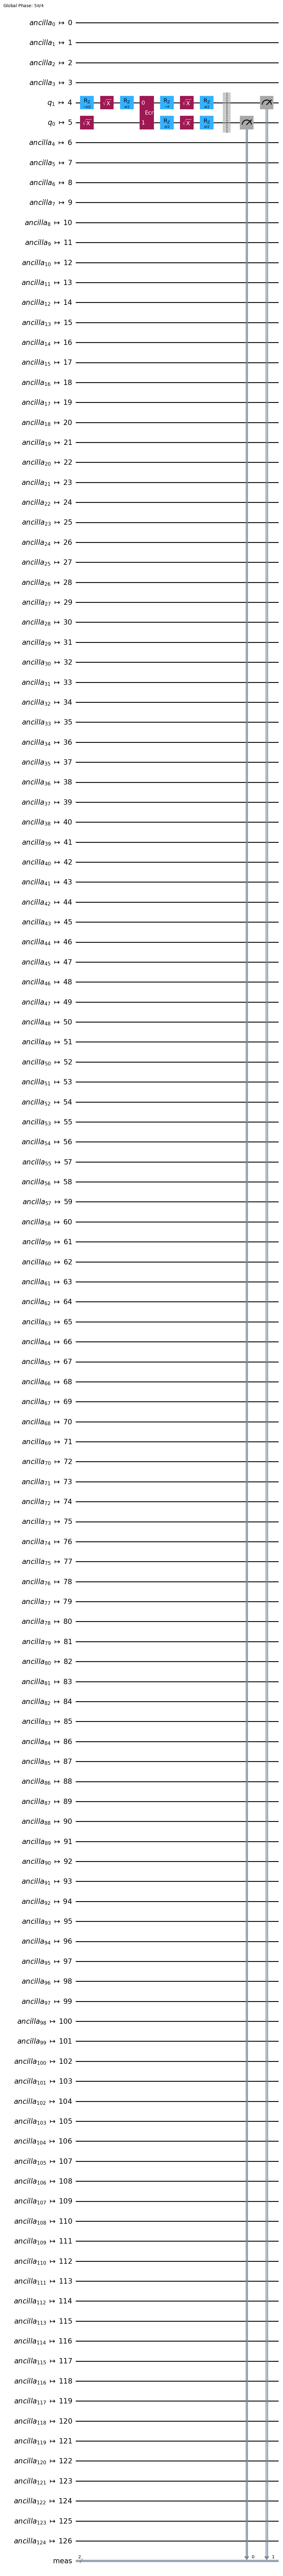

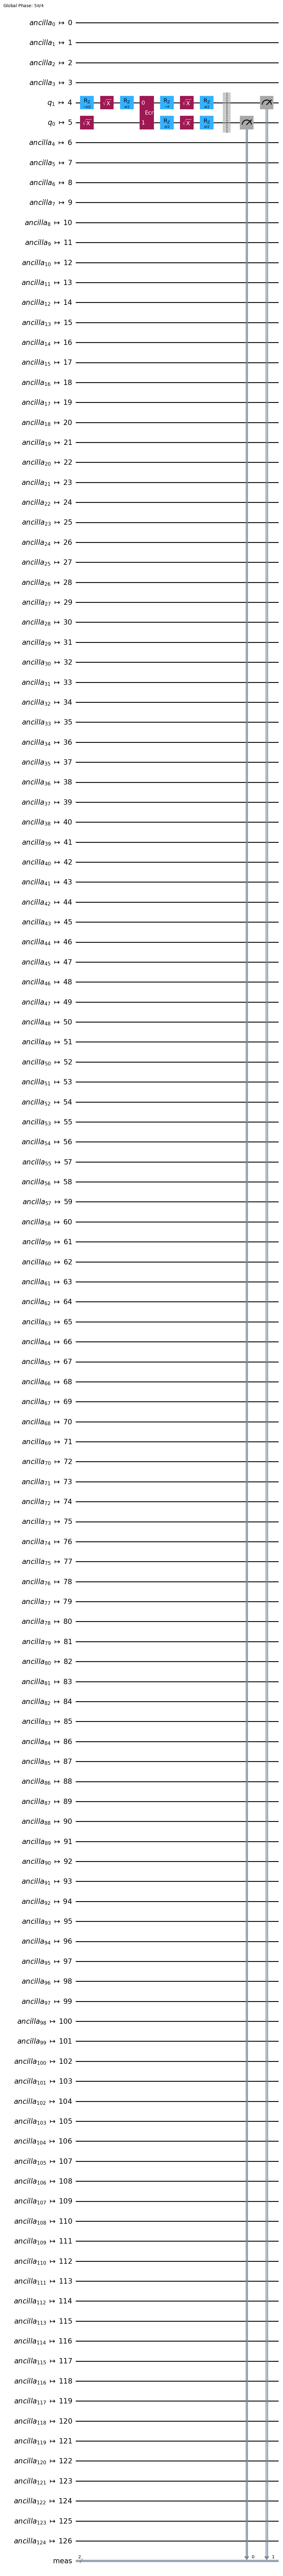

In [17]:
transpiled_qc_real.draw('mpl', fold=True)

In [18]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend_real)

job = sampler.run([(transpiled_qc_real, [])])

In [19]:
job.job_id()

'd0gcvk6crrag008bs330'

In [20]:
job.result()

KeyboardInterrupt: 

In [21]:
backend_least_busy = service.least_busy()

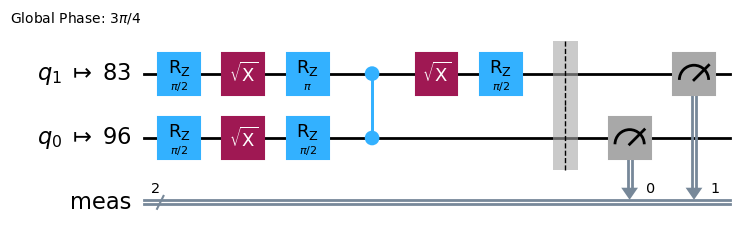

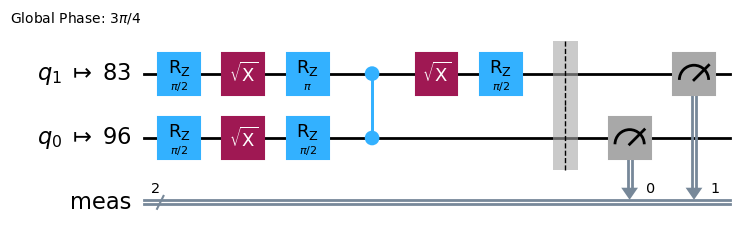

In [24]:
transpiled_qc_real = transpile(qc, backend_least_busy)

transpiled_qc_real.draw('mpl', idle_wires=False)

In [23]:
sampler = Sampler(mode=backend_least_busy)

job = sampler.run([(transpiled_qc_real, [])])

job.job_id()

'd0gcw2gehmr0008g7r40'

In [58]:
result = job.result()

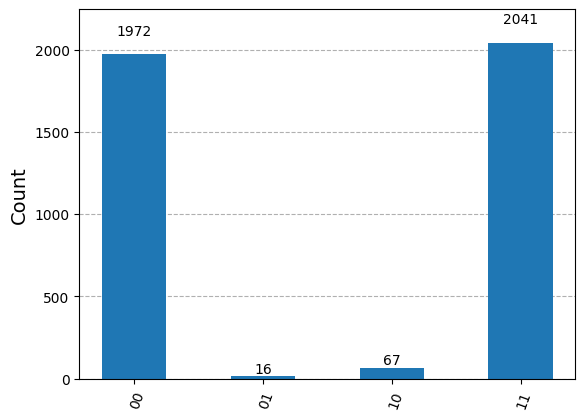

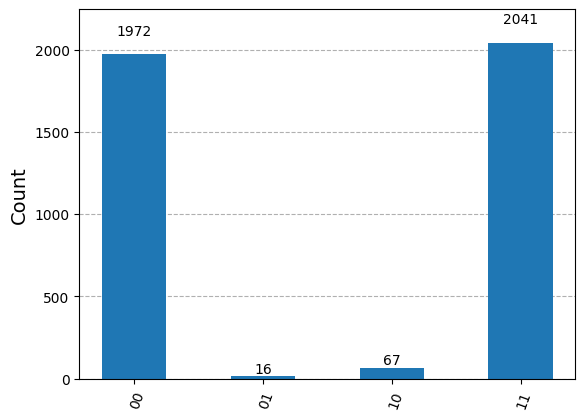

In [60]:
counts = result[0].data.meas.get_counts()

plot_histogram(counts)